In [1]:
import pandas as pd
import numpy as np
import argparse
import csv
import json
import os
import random
import sys

In [2]:
tempdata = pd.read_csv('data/cleanedmerchant_training.csv') ## read the file into to a pandas dataframe
data = tempdata[['merchant_name', 'cleanName2']]
validName = data[data['cleanName2'].notnull()]
validName.reset_index(inplace=True, drop = True)
validName.head(50)

C:\Users\XuYang\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3524: DtypeWarning: Columns (1,7,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,merchant_name,cleanName2
0,0 04 amc creve coeur,amc
1,0 05 amc security sq,amc
2,0 1 forever,forever 21
3,0 2 forever,forever 21
4,0 3 amc grand island,amc
5,0 3 forever,forever 21
6,0 58 amc bar arlington,amc
7,0 6 forever,forever 21
8,0 9 amc northpark,amc
9,0 9 forever,forever 21


In [3]:
from nltk import word_tokenize

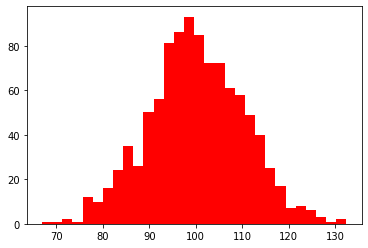

In [20]:
import matplotlib.pyplot as plt
import numpy as np
mu, sigma = 100, 10 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
s_2 = np.random.uniform(70, 130, 1000)

count, bins, ignored = plt.hist(s, 30, density=False, color = 'r')
# plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
#                np.exp( - (bins - mu)**2 / (2 * sigma**2) )
#          )
plt.show()

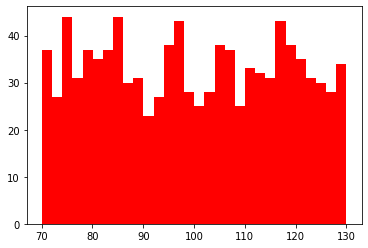

In [21]:
s_2 = np.random.uniform(70, 130, 1000)
count, bins, ignored = plt.hist(s_2, 30, density=False, color = 'r')

In [4]:
# raw_docs = ["Here are some very simple basic sentences.",
# "They won't be very interesting, I'm afraid.",
# "The point of these examples is to _learn how basic text cleaning works_ on *very simple* data."]
raw_docs = validName['merchant_name'].to_list()
tokenized_docs = [word_tokenize(doc) for doc in raw_docs]
print(tokenized_docs[2])

['0', '1', 'forever']


In [5]:
import re
import string
regex = re.compile('[%s]' % re.escape(string.punctuation)) #see documentation here: http://docs.python.org/2/library/string.html

tokenized_docs_no_punctuation = []

for review in tokenized_docs:
    new_review = []
    for token in review:
        new_token = regex.sub(u'', token)
        if not new_token == u'':
            new_review.append(new_token)
    
    tokenized_docs_no_punctuation.append(new_review)
    
print(tokenized_docs_no_punctuation[2])

['0', '1', 'forever']


In [6]:
from nltk.corpus import stopwords

tokenized_docs_no_stopwords = []

for doc in tokenized_docs_no_punctuation:
    new_term_vector = []
    for word in doc:
        if not word in stopwords.words('english'):
            new_term_vector.append(word)
    
    tokenized_docs_no_stopwords.append(new_term_vector)

print(tokenized_docs_no_stopwords[2])

['0', '1', 'forever']


In [7]:
cleaned_sentences = [' '.join(words) for words in tokenized_docs_no_stopwords]
len(cleaned_sentences) == len(validName)

True

In [8]:
validName['merchant_name'] = cleaned_sentences

C:\Users\XuYang\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
def shuffle_dataset(dataset):
    """
    Shuffle samples in dataset.

    Args:
        dataset: (list) list of tuples like: [(transaction, start_idx, end_idx), ..... , ]

    Returns:
        dataset: (list) list of tuples like: [,....., (transaction, start_idx, end_idx), ..... , ]

    """

    shuffled_indices = list(range(len(dataset)))
    random.shuffle(shuffled_indices)
    dataset = [dataset[index] for index in shuffled_indices]

    return dataset
def get_merchant_indices_in_sentence(sentence, merchant):
    """
    Given transaction string and merchant string, returns start end end indices of merchant in transaction string.

    Args:
        sentence: (string) transaction string. (example: )
        merchant: (string) merchant name. (example: )

    Returns:
        sentence: (string) converted to upper strings
        start: (int) merchant string start index
        end: (int) merchant string end index

    Examples:
        sentences, start, end = get_sentence_indices("Target 00014423 WATERTOWN MA","target")

        sentences: "TARGET 00014423 WATERTOWN MA"
        start: 0
        end: 6
    """

    sentence = sentence.upper()
    merchant = merchant.upper()

    start = -1
    end = -1

    idx = sentence.find(merchant)
    if idx != -1:
        start = idx
        end = start + len(merchant)

    return sentence, start, end

In [10]:
validName.sample(10)

,merchant_name,cleanName2
77564,amazon prime vd2we2hw,amazon
276264,doordash crepevine,doordash
214729,caseys ge bestor,casey's general stores
420672,senor tequila mt pleasa,senor tequila
369524,paypal lyft ride fri 8pm,lyft
84471,amazon vm6073yh,amazon
262394,dollar ge gastonia hig,dollar general
221435,cdsr walmart neigh market 6 dlberville ms,walmart
138461,amzn mktp us m73gq29h,amazon
431420,speedy mart easley scus,speedy mart


In [11]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

for idx, row in validName.iterrows():
    # print('Processing row: ', idx)
    # print('row0: ', row[0])
    # print('row1: ', row[1])
    # print(row[0].find(row[1].split(' ')[0]))
    # print(len(row[1]))
    find_i = row[0].find(row[1].split(' ')[0])
    if find_i + len(row[1]) > len(row[0]):   
        row[0] = row[0][:find_i] + row[1]
    
    sentence, start, end = get_merchant_indices_in_sentence(row[0], row[1])
    validName.loc[idx, 'start_idx'] = start
    validName.loc[idx, 'end_idx'] = end

print(validName.sample(50))
#validName.to_csv('data/dataset.csv')

C:\Users\XuYang\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\XuYang\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


                               merchant_name       cleanName2  start_idx  \
62474                   amazon prime 8z52k3z           amazon        0.0   
157227                 amzn mktp us my4424so           amazon       -1.0   
233095       circle k 06712 7330 columbus ga         circle k        0.0   
190702                      audible tr0cf3al          audible        0.0   
269230                 dollar tr 2700 martha      dollar tree       -1.0   
118774   amzn mktp us c43ln6it3 amzn bill wa           amazon       -1.0   
60762                  amazon prime 4w1ni6kp           amazon        0.0   
334336                    kwik trip pines mn        kwik trip        0.0   
355248                 murry discount liquor  discount liquor        6.0   
224951              chevron 0381126 portland          chevron        0.0   
433596  starbucks store 06393 houston tx usa        starbucks        0.0   
73131                  amazon prime my4r842k           amazon        0.0   
361437      

In [12]:
validName.to_csv('data/dataset.csv')

In [13]:
cleandataset = pd.read_csv('data/dataset.csv')
cleandataset.columns

Index(['Unnamed: 0', 'merchant_name', 'cleanName2', 'start_idx', 'end_idx'], dtype='object')

In [14]:
cleandataset = cleandataset.drop(columns = 'Unnamed: 0')
cleandataset.columns

Index(['merchant_name', 'cleanName2', 'start_idx', 'end_idx'], dtype='object')

In [15]:
cleandataset.index

RangeIndex(start=0, stop=483250, step=1)

In [16]:
cleandataset = cleandataset[cleandataset['start_idx']!=-1]
len(cleandataset)

287687

In [17]:
cleandataset.reset_index(drop=True)

,merchant_name,cleanName2,start_idx,end_idx
0,0 04 amc creve coeur,amc,5.0,8.0
1,0 05 amc security sq,amc,5.0,8.0
2,0 1 forever 21,forever 21,4.0,14.0
3,0 2 forever 21,forever 21,4.0,14.0
4,0 3 amc grand island,amc,4.0,7.0
...,...,...,...,...
287682,zw100082 bp w100082 jackson tn,bp,9.0,11.0
287683,zxbuzamxgxnwnst peloton membership new york ci...,peloton,16.0,23.0
287684,zyia active llc,zyia active,0.0,11.0
287685,zyia active llc 4353835263 ut usa,zyia active,0.0,11.0


In [18]:
cleandataset.to_csv('data/dataset.csv')

In [ ]:
def character_embedding(text, max_len=300, emb_dim=8):
        """
        Embeds character string with the use of (emb_dim)-bit binary values of each character.

        Args:
            text: (string) text to embed
            max_len: (int) maximum length of text that will be encoded. Padding will be done with zeros.
            emb_dim:

        Returns:
            str_array: (ndarray) 2 dimensional numpy array containing embedded text of shape emb_dim*max_len

        """

        # cut long text with maximum accepted length
        if len(text) > max_len:
            text = text[:max_len]

        str_array = np.zeros((emb_dim, max(len(text), max_len)), dtype=np.int32).tolist()

        for index, char in enumerate(text):
            str_binary = format(ord(char), 'b').zfill(emb_dim)[::-1]
            str_binary = str_binary[:emb_dim]
            for str_index, str_char in enumerate(str_binary, 0):
                str_array[str_index][index] = int(str_char)
       
        padding_str_binary = '0' * emb_dim
        
        for index in range(len(text), max_len):
            for str_index, str_char in enumerate(padding_str_binary, 0):
                str_array[str_index][index] = int(str_char)

        return str_array

In [ ]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
emb = character_embedding('Martin')
emb

In [ ]:
df = cleandataset.sample(frac=1).reset_index(drop=True)

In [ ]:
train_dataset = df[:int(0.7 * len(df))]
val_dataset = df[int(0.7 * len(df)): int(0.85 * len(df))]
test_dataset = df[int(0.85 * len(df)):]

In [ ]:
train_dataset.head(50)

#### Rule matching

In [ ]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)
# Add match ID "HelloWorld" with no callback and one pattern
pattern = [{"LOWER": "hello"}, {"IS_PUNCT": True}, {"LOWER": "world"}]
matcher.add("sID", [pattern])

doc = nlp("Hello, world! Hello world!")
matches = matcher(doc)

for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)

In [ ]:
import spacy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import re

nlp = spacy.load("en_core_web_sm")
doc = nlp("dollar general w main a")
print(doc.ents)
# for idx, row in sample_10.iterrows():
#     # print('processing row: ', idx)
#     # print(row[0])
#     doc = nlp(row[0])
#     all_entities = doc.ents
#     print(all_entities)
#     # print(all_entities)
#     #extraction_temp = str(process.extractOne(row[1], all_entities)[0])
#     #extraction =  re.sub(r"inc|mktp|\d+", "", extraction_temp) 
#     #print('extraction result: ', extraction_temp)

In [ ]:
import pandas as pd
import numpy as np
cleanData = pd.read_csv('data/cleanedmerchant_training.csv')
cleanData.columns

In [ ]:
# stopwordFreeds[(stopwordFreeds['cleanName2'] != stopwordFreeds['CleanName3']) & (stopwordFreeds['CleanName3'] != 'chick fil')].sample(1000)

In [ ]:
cleanData.head()